In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import matplotlib.pyplot as plt


In [2]:
TRAIN_DIR = 'C:\\Users\\himan\\Downloads\\archive (10)\\'

In [3]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 1814 images belonging to 7 classes.
Found 452 images belonging to 7 classes.


In [4]:
model = Sequential()

model.add(keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet',
                                                                  include_top=False,
                                                                  input_shape=(100, 100, 3)))
model.add(L.Flatten())
model.add(L.Dense(256, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(7, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1, 1, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 54732007 (208.79 MB)
Trainable params: 54671463 (208.56 MB)
Non-trainable params: 60544 (236.50 KB)
________

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.997):
            print("\nReached 99.7% accuracy so cancelling training!")
            self.model.stop_training = True

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
            
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)


Epoch 1/10



56/56 [==============================] - 922s 5s/step - loss: 1.4050 - accuracy: 0.5561 - val_loss: 101.8442 - val_accuracy: 0.1205
Epoch 2/10
56/56 [==============================] - 157s 3s/step - loss: 0.8426 - accuracy: 0.7295 - val_loss: 125.5127 - val_accuracy: 0.2879
Epoch 3/10
56/56 [==============================] - 160s 3s/step - loss: 0.9587 - accuracy: 0.7407 - val_loss: 38714.3203 - val_accuracy: 0.1987
Epoch 4/10
56/56 [==============================] - 161s 3s/step - loss: 0.7333 - accuracy: 0.7363 - val_loss: 29.9804 - val_accuracy: 0.5982
Epoch 5/10
56/56 [==============================] - 158s 3s/step - loss: 0.6317 - accuracy: 0.7789 - val_loss: 2687.5710 - val_accuracy: 0.3906
Epoch 6/10
56/56 [==============================] - 167s 3s/step - loss: 0.5682 - accuracy: 0.8025 - val_loss: 54.1367 - val_accuracy: 0.6696
Epoch 7/10
56/56 [==============================] - 151s 3s/step - loss: 0.4377 - accuracy: 0.8356 - val_loss: 0.4992 - val_accuracy: 0.8326
Epoch 8/10


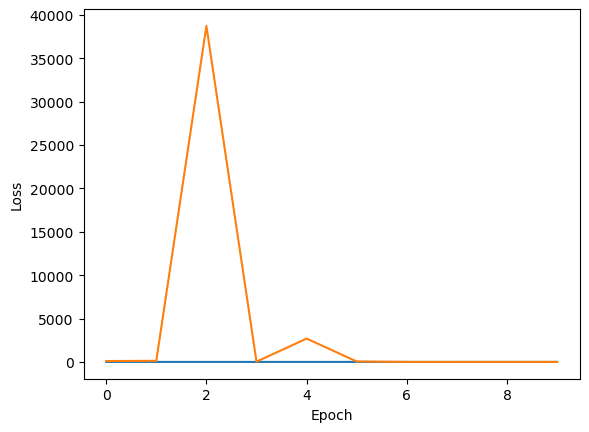

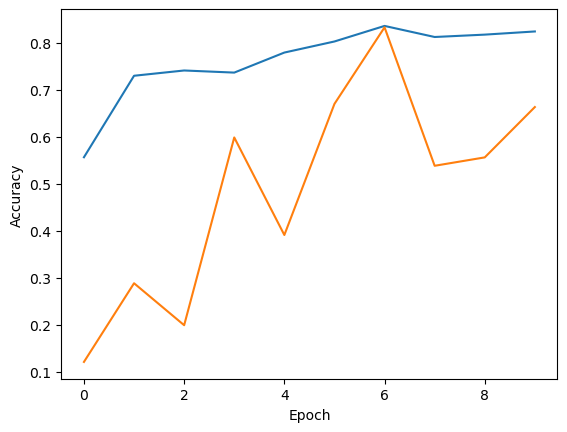

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [7]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 17s 17s/step
Predicted class: 0


In [8]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image1.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 1s 623ms/step
Predicted class: 1


In [9]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image2.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 366ms/step
Predicted class: 6


In [10]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'C:\\Users\\himan\\OneDrive\\Documents\\test_image3.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 269ms/step
Predicted class: 3


In [11]:
from keras.preprocessing import image
import numpy as np
# Load and preprocess a new image for prediction
img_path = 'Downloads\\img_test.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class (assuming a classification task)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 1s 566ms/step
Predicted class: 0
